In [12]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import interpolate

def integral(Y1,Y2,E1,E2):
    INT=(Y2*E2-Y1*E1)/((np.log(Y2/Y1)/np.log(E2/E1)+1))
    #print(E1,E2,INT)
    return INT

def load_obj(name):
    with open('C:\\Users\\ginti\\Desktop\\nirs\\' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def Y_NM_Mi20_a(energy,h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    if energy<1.7:
        a,b,c,d=0.5082, -3.0659, 7.2827, -9.5396
    #if energy<1.6:
    #    a,b,c,d=2.0404,	-8.1776,	12.354,	-11.1
    elif (energy>=1.7 and energy<15):
        a,b,c,d=0.1179,	-1.2022,	4.9329,	-8.65
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A = 9.422E-09*np.power(X,5) - 2.284E-07*np.power(X,4) + 2.037E-06*np.power(X,3) - 7.828E-06*np.power(X,2) + 1.203E-05*np.power(X,1) - 5.545E-06					
    B = -5.351E-06*np.power(X,5) + 1.316E-04*np.power(X,4) - 1.226E-03*np.power(X,3) + 5.176E-03*np.power(X,2) - 1.017E-02*np.power(X,1) + 1.458E-02				
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

def Y_NM_Mi20_p(energy, h):
    P=np.sqrt(energy*energy+2*0.938*energy)
    X=np.log(P)
    #if energy<1.25:
    #    a,b,c,d=6.09,	-14.06,	13.98,	-11.615
    if energy<1.28:
        a,b,c,d=0,	-8.6616,	13.879,	-12.104
    elif energy >=1.28 and energy<10:
        a,b,c,d=-0.186,	0.428,	2.831,	-8.76
    else:
        a,b,c,d=0,	-0.0365,	1.206,	-4.763
    LnY1000=a*X*X*X+b*X*X+c*X+d
    Y1000=np.exp(LnY1000)
    A= 6.945E-09*np.power(X,5) - 1.461E-07*np.power(X,4) + 1.115E-06*np.power(X,3) - 3.402E-06*np.power(X,2) + 3.355E-06*np.power(X,1) - 9.823E-07
    B= -3.963E-06*np.power(X,5) + 8.091E-05*np.power(X,4) - 6.394E-04*np.power(X,3) + 2.348E-03*np.power(X,2) - 4.713E-03*np.power(X,1) + 1.186E-02
    alt_dep=(1000-h)*(1000-h)*A+(1000-h)*B
    Y=Y1000*np.exp(alt_dep)
    return Y

In [13]:
def hepams(ener):
    
    data_protons = load_obj('AMS_spec_p')
    data_he = load_obj('AMS_spec_he')

    newprot = []

    for k in data_protons:
        x = np.log10(data_protons[k][0])
        y = np.log10(data_protons[k][2])
        f = interpolate.interp1d(x, y, fill_value="extrapolate")

        xnew = np.log10(data_he[k][0])
        ynew=f(xnew)

        newprot.append(10**ynew)
    
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavy.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[1])
    iheavy.close()

    l = 0
    hep = []
    meh = []

    for i in data_he:
        a = (float(data_he[i].iloc[[ener], [2]].values)*(1 + float(heavy[ener])))/float(newprot[l][ener])
        hep.append(a)                
        l+=1
        
    return hep

In [14]:
def heppam(ener):
    
    data_protons = load_obj('p_PAM_CR')
    data_he = load_obj('a_PAM_CR')

    newprot = []

    for k in data_protons:
        x = np.log10(data_protons[k][0])
        y = np.log10(data_protons[k][2])
        f = interpolate.interp1d(x, y, fill_value="extrapolate")

        xnew = np.log10(data_he[k][0])
        ynew=f(xnew)

        newprot.append(10**ynew)
        
        
    iheavy = open('C:\\Users\\ginti\\Desktop\\nirs\\heavyp.txt','r')
    linesiheavy = iheavy.readlines()
    heavy = []
    for x in linesiheavy:
        heavy.append(x.split()[0])
    iheavy.close()

    l = 0
    hep = []
    meh = []

    for i in data_he:
        a = (float(data_he[i].iloc[[ener], [2]].values))*(1 + float(heavy[ener]))/float(newprot[l][ener])
        hep.append(a)                
        l+=1
        
    return hep

In [15]:
time = load_obj('AMS_time')
tams = []
for j in range(0,79):
    a = float(time.iloc[[j], [2]].values)
    tams.append(a)
    
time = load_obj('time_PAM_CR')
tpam = []
for j in range(0,51):
    a = float(time.iloc[[j], [2]].values)
    tpam.append(a)

In [16]:
d1 = load_obj('AMS_spec_he')
d2 = load_obj('a_PAM_CR')

In [17]:
d1

{2426:            0        1          2             3            4           5  \
 0      2.035    0.115  72.350000  1.835211e+00     0.447911    0.042389   
 1      2.275    0.125  66.680000  1.481891e+00     0.538646    0.048333   
 2      2.535    0.135  59.780000  1.216306e+00     0.641372    0.054369   
 3      2.820    0.150  53.170000  1.023181e+00     0.758297    0.062553   
 4      3.130    0.160  46.080000  8.486460e-01     0.889618    0.068722   
 ..       ...      ...        ...           ...          ...         ...   
 63   584.000   59.000   0.000089  2.225905e-06   291.069737   29.499848   
 64   732.500   89.500   0.000049  1.404345e-06   365.319435   44.749853   
 65   976.000  154.000   0.000024  8.377741e-07   487.069140   76.999856   
 66  1465.000  335.000   0.000009  4.210995e-07   731.568843  167.499857   
 67  2400.000  600.000   0.000002  1.961070e-07  1199.068612  299.999904   
 
              6             7  
 0   196.281155  4.978816e+00  
 1   172.451165 

In [18]:
hepp = heppam(0)
hepa = hepams(6)

In [19]:
time = load_obj('time_PAM_CR')
print(len(hepp))

51


Text(0.5, 0, 'time')

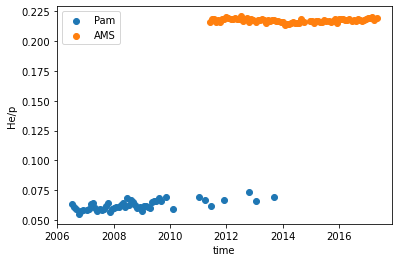

In [20]:
plt.scatter(tpam,hepp)
plt.scatter(tams,hepa)
plt.legend(["Pam", "AMS"])
plt.ylabel('He/p')
plt.xlabel('time')

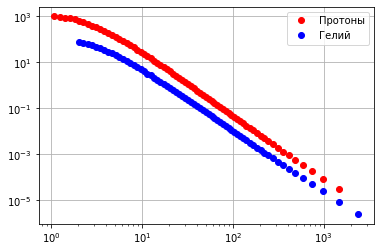

In [23]:
data_protons = load_obj('AMS_spec_p')
data_he = load_obj('AMS_spec_he')

plt.loglog(data_protons[2426][0], data_protons[2426][2], 'ro')
plt.loglog(data_he[2426][0], data_he[2426][2], 'bo')

plt.grid()
plt.legend(["Протоны", "Гелий"])
#plt.xlim(0.9,10)
#plt.ylim(1e-1, 2e4)

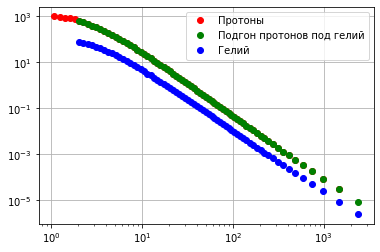

In [24]:
x = np.log10(data_protons[2426][0])
y = np.log10(data_protons[2426][2])
f = interpolate.interp1d(x, y, fill_value="extrapolate")

xnew = np.log10(data_he[2426][0])
ynew=f(xnew)

plt.loglog(10**x,10**y, 'ro')
plt.loglog(10**xnew,10**ynew, 'go')
plt.loglog(data_he[2426][0], data_he[2426][2], 'bo')
plt.grid()
plt.legend(["Протоны", 'Подгон протонов под гелий', "Гелий"])
#plt.xlim(0.9,10)
#plt.ylim(1e-1, 2e4)

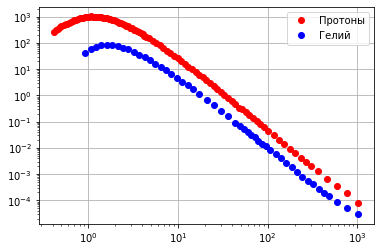

In [25]:
data_protons = load_obj('p_PAM_CR')
data_he = load_obj('a_PAM_CR')

plt.loglog(data_protons[2049][0], data_protons[2049][2], 'ro')
plt.loglog(data_he[2049][0], data_he[2049][2], 'bo')
plt.grid()
plt.legend(["Протоны", "Гелий"])
#plt.xlim(0.9,10)
#plt.ylim(1e-1, 2e4)

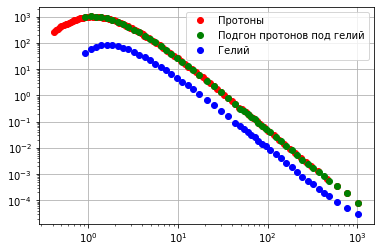

In [26]:
x = np.log10(data_protons[2045][0])
y = np.log10(data_protons[2049][2])
f = interpolate.interp1d(x, y, fill_value="extrapolate")

xnew = np.log10(data_he[2049][0])
ynew=f(xnew)

plt.loglog(10**x,10**y, 'ro')
plt.loglog(10**xnew,10**ynew, 'go')
plt.loglog(data_he[2049][0], data_he[2049][2], 'bo')
plt.grid()
plt.legend(["Протоны", 'Подгон протонов под гелий', "Гелий"])
#plt.xlim(0.9,10)
#plt.ylim(1e-1, 2e4)